In [16]:
pip install numpy --upgrade

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import hsv_to_rgb

C:\Users\abhin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


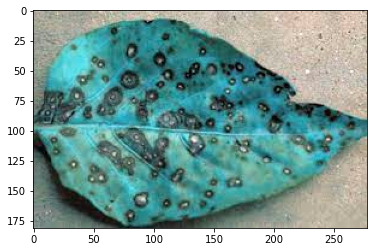

In [2]:
img = cv2.imread(r"C:\Users\abhin\OneDrive\Desktop\download.jpeg")
plt.imshow(img)
plt.show()

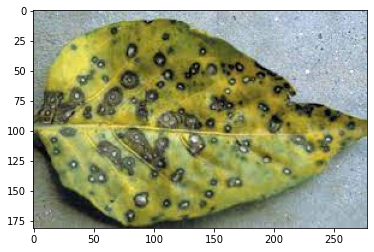

In [39]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

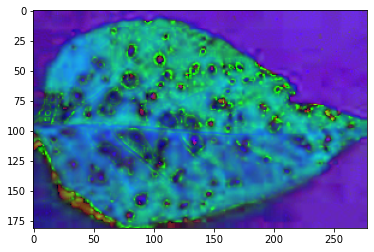

In [40]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

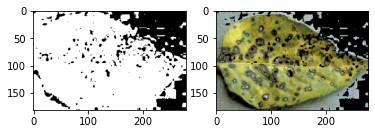

In [41]:
#color thresholding(numpy),binary mask
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

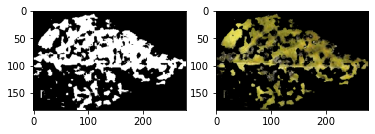

In [42]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()

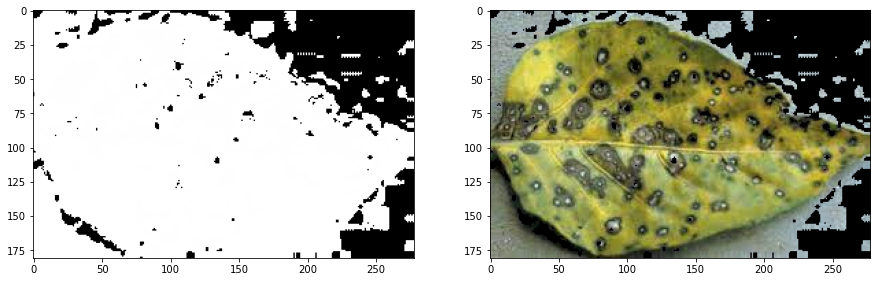

In [43]:
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [44]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [45]:
# # Feature Descripotor
sift = cv2.xfeatures2d.SIFT_create()
# Find keypoints and descriptors directly
kp, des = sift.detectAndCompute(final_result, None)
print(len(kp))


749


In [46]:
print(kp)

(< cv2.KeyPoint 0000016584E8D960>, < cv2.KeyPoint 000001658530B570>, < cv2.KeyPoint 000001658536C120>, < cv2.KeyPoint 000001658536C3F0>, < cv2.KeyPoint 000001658536C060>, < cv2.KeyPoint 0000016584D364E0>, < cv2.KeyPoint 0000016584D36C00>, < cv2.KeyPoint 0000016584D36900>, < cv2.KeyPoint 0000016584D36660>, < cv2.KeyPoint 0000016584D36B10>, < cv2.KeyPoint 0000016585083EA0>, < cv2.KeyPoint 0000016584FE9A80>, < cv2.KeyPoint 0000016584FE91E0>, < cv2.KeyPoint 0000016584FE9600>, < cv2.KeyPoint 0000016584E9BDE0>, < cv2.KeyPoint 0000016584F66AB0>, < cv2.KeyPoint 0000016584F66510>, < cv2.KeyPoint 0000016584F66600>, < cv2.KeyPoint 0000016584F665A0>, < cv2.KeyPoint 0000016584F664E0>, < cv2.KeyPoint 0000016584F66540>, < cv2.KeyPoint 0000016584F665D0>, < cv2.KeyPoint 0000016584F66720>, < cv2.KeyPoint 0000016585122DE0>, < cv2.KeyPoint 0000016584D28B10>, < cv2.KeyPoint 0000016584D28A20>, < cv2.KeyPoint 00000165DF567AB0>, < cv2.KeyPoint 0000016584CDA390>, < cv2.KeyPoint 0000016584CDA900>, < cv2.KeyPoin

In [47]:
print(des)

[[ 85.  28.  24. ...   0.   5.  48.]
 [107.  52.  10. ...   1.   0.   1.]
 [ 23.  14.   0. ... 104.   4.   2.]
 ...
 [  5.   0.   0. ...   0.   0.  25.]
 [ 68.   1.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...  71.   0.   1.]]


In [48]:
img2 = cv2.drawKeypoints(final_result,kp,None,(255,0,0),4)

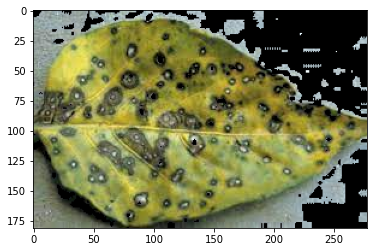

In [49]:
plt.imshow(final_result)


In [50]:
# global Feature
global_feature = des

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_feature)

In [52]:
global_feature.shape

(749, 128)

In [53]:
sift.descriptorSize()

128

In [54]:
print("[STATUS] feature vector size {}".format(np.array(global_feature).shape))


[STATUS] feature vector size (749, 128)


In [55]:
a = global_feature
np.savetxt("doo.csv", a, delimiter=",")